In [ ]:
# Cell 1: Import Libraries
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [ ]:
# Cell 2: Load and Split Data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


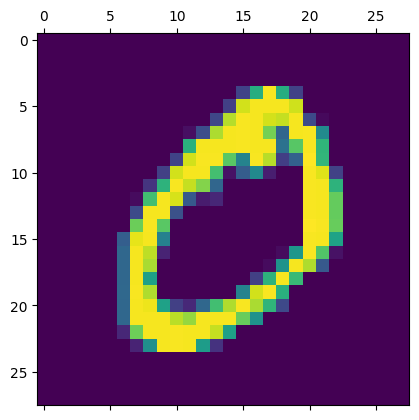

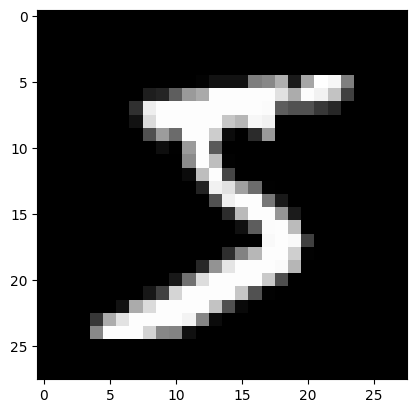

In [ ]:
# Cell 3: Visualize Data
plt.matshow(x_train[1])
plt.show()

plt.imshow(x_train[0], cmap="gray")
plt.show()


In [ ]:
# Cell 4: Normalize Data
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
# Cell 5: Build Model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Cell 6: Compile and Train
model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7383 - loss: 1.0275 - val_accuracy: 0.9029 - val_loss: 0.3532
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9013 - loss: 0.3513 - val_accuracy: 0.9189 - val_loss: 0.2918
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9163 - loss: 0.2956 - val_accuracy: 0.9284 - val_loss: 0.2579
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9276 - loss: 0.2593 - val_accuracy: 0.9331 - val_loss: 0.2343
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9329 - loss: 0.2383 - val_accuracy: 0.9387 - val_loss: 0.2167
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9379 - loss: 0.2235 - val_accuracy: 0.9409 - val_loss: 0.2017
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9455 - loss: 0.2009 - val_accuracy: 0.9457 - val_loss: 0.1881
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9480 - loss: 0.1855 - 

In [ ]:
# Cell 7: Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss=%.3f" % test_loss)
print("Accuracy=%.3f" % test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9452 - loss: 0.1874
Loss=0.160
Accuracy=0.954


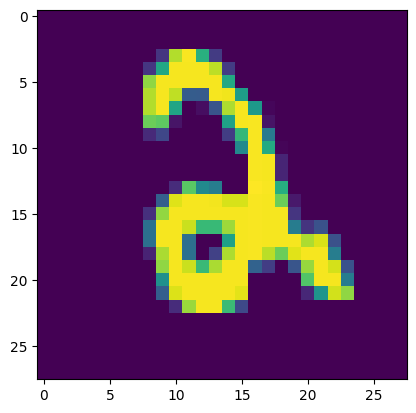

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[1.0138631e-06 2.6266026e-08 9.9538243e-01 3.6211740e-04 6.6867858e-07
 1.2008446e-06 4.2382637e-03 7.3903720e-08 1.4124836e-05 4.2836032e-08]


In [ ]:
# Cell 8: Predictions and Visualization
n = random.randint(0, 9999)
plt.imshow(x_test[n])
plt.show()

predicted_value = model.predict(x_test)
print(predicted_value[n])

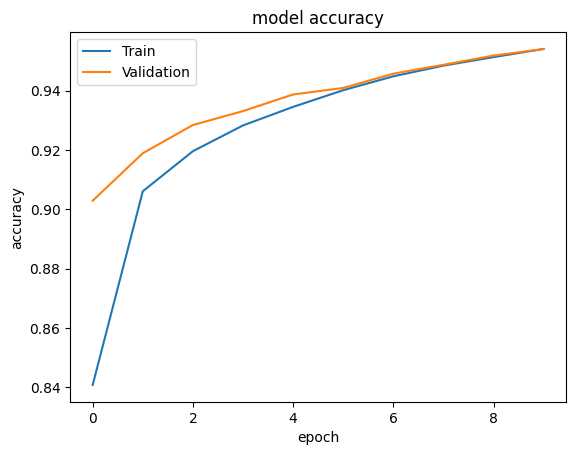

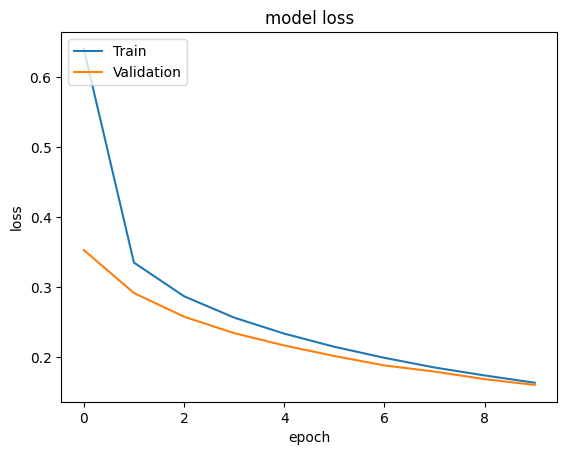

In [ ]:
# Cell 9: Plot Accuracy and Loss Curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()